In [2]:
import sympy as sy


In [2]:
sy.QQ

QQ

In [3]:
x,y,z = sy.symbols("x y z")

In [6]:
sy.QQ.old_poly_ring(x).free_module(2)

QQ[x]**2

In [31]:
L = 10
s, i1, i2, i3, v1, v2, v3 = sy.symbols('s i1 i2 i3 v1 v2 v3')
e1 = sy.Eq(v1 - v2,  1j*s*L * i1 )
e2 = sy.Eq(v2 - v3, 1j*s*L * i1 )
sy.solve(e1,e2)




TypeError: cannot determine truth value of Relational

In [38]:
L = 10
s, i1, i2, i3, v1, v2, v3 = sy.symbols('s i1 i2 i3 v1 v2 v3')
e1 = v1 - v2 -  1j*s*L * i1 
e2 = v2 - v3 - 1j*s*L * i1 
e3 = 1j * s * 13 * (v1 - v3) - i2
e4 = i1 + i2 - i3
sy.groebner([e1,e2,e3,e4] , v3, i1,i2, i3, v2, v1, s  )

GroebnerBasis([1.0*v1 - 2.0*v2 + v3, i1 - i3 + 26.0*I*s*v1 - 26.0*I*s*v2, i2 - 26.0*I*s*v1 + 26.0*I*s*v2, i3*s - 26.0*I*s**2*v1 + 26.0*I*s**2*v2 + 0.1*I*v1 - 0.1*I*v2], v3, i1, i2, i3, v2, v1, s, domain='EX', order='lex')

If I just truncated the equations, that would be the analog of just taking the lower rows of a row echelon form. Is that right? Does there always exist some solution that makes it work? If a thing obeys this reduced set of equations, there exists a way to extend it? I don't think so.


Ok. Here's what I think? We take the full N^2 set of lt() gi - lt() gj.
Then we reduce them with respect to the grobner basis. (which should equal zero)



In [ ]:
resistor =  [[0, 1, 0, -1],
             [R,1,-R, 0 ]]
    
inductor = [[0,1,0,-1],
            [1,L*s,-1,0]]
cap = [[0,1 ,0,-1],
       [C*s,1, -C*s , 0]]

par(cap,cap)
compose(   ) = overlapstack()
               eliminate

    
    
    axiom schema
    
    allterms generator. allterms with holes 
    def induction(allterms):
         generator of all possible instantiations
    
Isar 
Proof.assume(      )
     .assert(      ).auto()
     .assert(      ).induction( lambda a : P(x) )
     . 

In [1]:
import sympy as sy

In [36]:
s, i1, i2, v1, v2 = sy.symbols('s i1 i2 v1 v2')

In [33]:
L = 10
f = sy.Matrix(  [[0,1,0,-1],
            [1,L*s,-1,0]] ).echelon_form()
map(lambda x: sy.poly(x, s), f )

[Poly(1, s, domain='ZZ'),
 Poly(10*s, s, domain='ZZ'),
 Poly(-1, s, domain='ZZ'),
 Poly(0, s, domain='ZZ'),
 Poly(0, s, domain='ZZ'),
 Poly(1, s, domain='ZZ'),
 Poly(0, s, domain='ZZ'),
 Poly(-1, s, domain='ZZ')]

In [39]:
sy.Matrix([1,2,3])

Matrix([
[1],
[2],
[3]])

One thing we can do is just use the groebner basis over the linear set of equations. It's an elephant gun for a fly. But we do already have grobner bases.
Use an elimination ordering.
Bada bing bada boom.
Theoretical results rely on the fact we are using modules, such as the fact that 


I'm not sure how a generator representation even makes sense

Syzygy's give me info about the annihilators which seems less useful
But I can use an elimination ordering to directly get rid of stuff
Order in terms of

Syzygies of the  matrix transpose - generators
exercise 6 chapter 4 of using algerba

We want an orderings such that the variables to be eliminated  appear at the highest level (with the most stuff in them)


Willems talks about Smith and Hermite normal form. I haven't found a convenient seeming package to calculate them. They seem more geared at integer problems than polynomial problems. And I have my eye on PDE or band theory problems, for which they are no longer appropriate and grobner basis techniques are the main game in town.

Sympy has a grobner basis implementation, and a hell of a tutorial from Matt Pap
https://mattpap.github.io/masters-thesis/html/src/groebner.html

For example, one can use groebner basis techniques to perform gauss elimination
https://mattpap.github.io/masters-thesis/html/src/groebner.html#special-case-1-gauss-algorithm

What I basically want is gaussian elimination except such that it doesn't divide. The built in sympy functions for matrix manipulation seem cavalier on this point, which makes sense for most application. Usually they are matrices over fields.


In [52]:
def matrix_to_eqs(m):
   nrows, ncols = m.shape
   gens = [sy.Dummy() for i in range(ncols)]
   eqs = m @ sy.Matrix(gens)
   return eqs, gens
def eqs_to_matrix(eqns, gens):
    return sy.Matrix( [[ eq.coeff(g) for g in gens] for eq in eqns])
        
    

In [54]:
print(f)
eqs, gens = matrix_to_eqs(f)
eqs_to_matrix(sy.groebner(eqs), gens)

Matrix([[1, 10*s, -1, 0], [0, 1, 0, -1]])


Matrix([
[1, 0, -1, 10*s],
[0, 1,  0,   -1]])

In [38]:
 sy.groebner([i2 - i1, L * s * i1 - (v2 - v1)])

GroebnerBasis([10*i2*s + v1 - v2, i1 - i2], s, v1, v2, i1, i2, domain='ZZ', order='lex')

In [14]:
sy.diag(f,f) # direct sum
def vstack(f,g):
    return f.row_join(g) # nondecturctive it appears
def hstack(f,g):
    return f.col_join(g)
f.shape

(2, 4)

In [20]:
d,r = sy.div(1 + s**2, s)

In [30]:
nrow = f.shape[0]
ncol = f.shape[1]
print(f)
for i in range(nrow):
    for j in range(i+1, nrow):
        print(f[i,i])
        print(f[j,i])
        print(sy.div(f[i,i], f[j,i] , domain="QQ"))
    #for j in range(f.shape[1]):
        

Matrix([[1, 10*s, -1, 0], [0, 1, 0, -1]])
1
0


ComputationFailed: div(1, 0) failed without generators

In [117]:
from graphviz import Graph, Digraph, Source

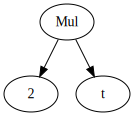

In [119]:
#print(sy.dotprint(2*t))
Source(sy.dotprint(2*t))

In [11]:
sy.singleton.S.Zero

0

In [29]:
q = sy.Function("q")
t = sy.Symbol("t")
t2 = sy.Symbol("t2")
i = sy.integrate(q(t),t)
sy.diff(i, q(t))
print(t._eval_derivative)
def funderiv(self,s):
    print(self)
    print(s)
    print(s.func == self.func)
    if sEq(s.func ,self.func):
        print(sy.DiracDelta(s.args[0] - self.args[0]))
        return sy.DiracDelta(s.args[0] - self.args[0])
    if self.args[0] == s:
        return sy.Derivative(self, s)
    else:
        return sy.singleton.S.Zero

q._eval_derivative = funderiv
i = sy.integrate(q(t),t)
'''q    def _eval_derivative(self, s):
        if self == s:
            return S.One
        return S.Zero
'''
i
print("dirv")
i._eval_derivative(q(t2))
#sy.Delta(0)

q(t)
t
q(t)
t
q(t)
t
<bound method AtomicExpr._eval_derivative of t>
q(t)
t
False
q(t)
t
False
q(t)
t
False
dirv
q(_u)
_xi_0
False


Integral(0, t)

Integral((dq(t) + q(t))**2 + Derivative(dq(t) + q(t), t)**2, t) - Integral(q(t)**2 + Derivative(q(t), t)**2, t)
None


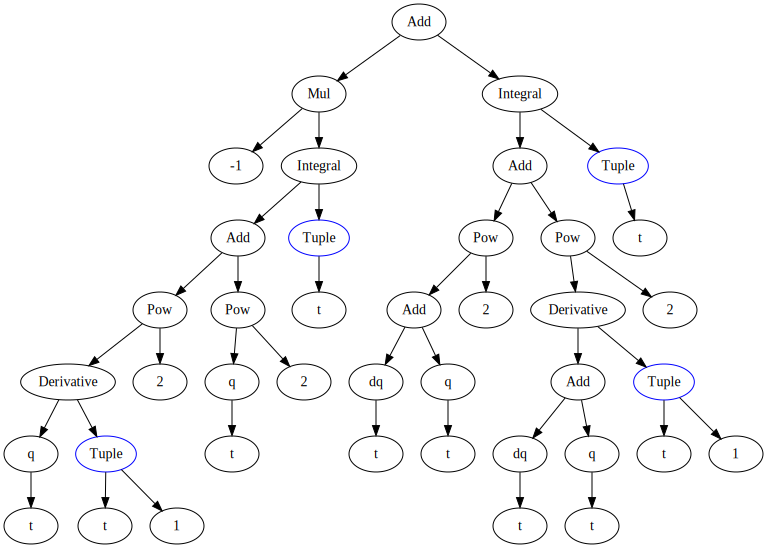

In [147]:

q = sy.Function("q")
t = sy.Symbol("t")
dq = sy.Function("dq")
qdot = sy.diff(q(t),t)
L = qdot**2 + q(t)**2
S = sy.integrate(L,t)
sy.diff(S,q(t)) # Nope.
dS = S.replace(q(t), q(t) + dq(t)) - S
#dS.collect(dq(t))
dS
#Source(sy.dotprint(dS.doit().expand().simplify().collect( dq(t) ).replace(dq(t)**2 , 0)))
#sy.integrate( qdot , t) # ok it knows this much


def ibp(e,u = None, dv = None):
    if e.func == sy.Integral:
        
        integrand = e.args[0]
        t = e.args[1][0]
        if u != None:
            dv = integrand / u
        if dv != None:
            u = integrand / dv
        v = sy.integrate(dv)
        du = sy.diff(u)
        return u * v - sy.Integral( v * du , t )
# sy.Integral.ibp = ibp # this could remove the first check.

# sy.Basic.__get_index__(self,n) = self.args[n]
# sy.Basic.push(n) = child =  self.args[n]; child.pop = lambda : self.args[n] = ; return child  
# sy.Basic.
# child.set ? child.cb ?   very lensy what we're doing.

ibp( sy.integrate( t * sy.diff(q(t), t)  ) , dv = sy.diff(q(t),t) )
dS.doit().replace(dq(t)**2, 0).replace(sy.Derivative(dq(t),t)**2, 0).expand().simplify()

def flippy(e):
    if e.func == sy.Integral:
        integrand = e.args[0]
        if integrand.func == sy.Add:
            return sy.Add( [sy.Integral( a ) for a in integrand.args ] )
    if e.func == sy.Add:
        if all([ a.func == sy.Integral for a in e.args]):
            return sy.Integral( sy.Add( [a.args[0] for a in e.args]))
            
print(dS)
sy.dotprint(dS)
print(flippy(dS))
Source(sy.dotprint(dS))
#def ibp(e, u = , dv =):
#    pass
#sy.srepr(sy.integrate( t * qdot , t)) 

In [123]:
dS.args[0].func

sympy.core.mul.Mul

In [ ]:
q = sy.Symbol("q")
qdot = sy.Symbol("qdot")



In [98]:
u = sy.Function("u")
v = sy.Function("v")
t = sy.Symbol("t")

e = sy.integrate(sy.diff(u(t) * v(t) , t) , t)
e1 = sy.Integral(sy.Derivative(u(t) * v(t) , t) , t)
e1.args[0].doit()
#e.expand().simplify() + e1 - e1.doit()

#cursor. e[1][2].swap(1,2).ap( lambda x: x + 7).expand.simplify.
class Cursor(Basic):
    def __init__(self, expr):
        self.exprs = [expr]
        self
    def 

def linear(e):
    if e.func == Add:
        # distribute addition under all the stuff, derivative, integral
    elif e.func == Integrate:
    elif e.func == Derivative:
        
        
#funsort = Sort()
#diff = Function(funsort,funsort)

# push 
# pop


TypeError: 'Integral' object is not subscriptable

In [ ]:
'''synthetic calculus in z3py

This is the analog of second order arithemtic in a vagye way
But also just having the idea of a syntax tree for functions made of composition, powers, trig, etc.
I like that we define stuff basically by it's differential equation
Unfortunately, with 

How to deal with integration? Maybe these shuld be function sets?

'''
fun = Sort()
diff = Function(fun, fun)
integ = Function(fun,fun)
diff(integ(x)) = x
integ(diff(x)) = x + C?
add = Function(fun,fun,fun) 
mul = Function(fun,fun,fun)
sub = 
compose = Function(fun,fun,fun)
diff(    )

apply = Function(fun, real, real) # eval?

cos = Const(fun)
sin = Const(fun)
exp = Const(fun)

# definition by diff eq
diff(cos) == negate(sin)
diff(sin) == cos
diff(exp) == exp


const = Function(real, fun)
power = Function(Int, fun) # power of x

ForAll([n], diff(power(n)) == (const n) * power(n-1))

distinct( everything )
# it's ultimately pretty similar to havign a syntax tree.


inverse = Function(fun,fun)



In [ ]:
https://abelian.readthedocs.io/en/latest/index.html
    https://desr.readthedocs.io/en/latest/_modules/desr/matrix_normal_forms.html#is_hnf_row
        https://github.com/tclose/Diophantine
            

In [1]:
sy.Matrix([[2,4],[2,4]]).nullspace()
sy.eye(3)[8]
sy.ones(3,2)
sy.ones(3)
sy.ones(2,1).nullspace()
sy.ones(2,1).columnspace()
def k(i,j):
    if i == j:
        return -2
    elif abs(i-j) == 1:
        return 1
    else:
        return 0
sy.Matrix(5,5, k)

NameError: name 'sy' is not defined

In [ ]:
# different stock sympy matrix solvers
s = sy.Symbol("s")


#sy.Matrix([[2-s,4],[2,4]]).QRdecomposition()
print(sy.Matrix([[2-s**2,4],[2 + 2*2,4 + 3*s**2]]).LUdecomposition())
print(sy.Matrix([[2-s,4],[2,4]]).LUdecompositionFF())
print(sy.Matrix([[2-s,4],[2,4]]).echelon_form(with_pivots=True))
print(sy.Matrix([[2-s,4],[2,4]]).columnspace())
print(sy.Matrix([[2-s,4],[2,4]]).rref())

Gaussian elimination is related to grobner bases.
a matrix is a linear system of equations
nx + my + b = 0


sure we can add together two rows in such a way as to clear out x, and add this to our set of equations. This is an S polynomial step. Then the reduction step is division of all with respect to the others.

Division of polynomials is the analog of inverting a tridiagonal matrix? division with remainder may be the analog of some kind of tridiagonal spliting


Pivoting columns corresponds to changing a variable ordering.


Is LU decomposition of a polynomial matrix acceptable?